### HW recap and setup

We will train Logistic Regression, which was the 2nd topic of Lecture 4.

Instead of the Iris dataset, we will use load the Digits dataset using "sklearn.datasets.load_digits()".
You'll use "X = digits["data"]" and "y = digits["target"]" to load images (=features) and their true labels.

Use the seed 0 everywhere.

1. Plot the first 100 images (with 10 images per row) as you did with MNIST. This dataset is  different from MNIST in sizes, number of examples, values, etc. You should modify the plotting function to accommodate the differences.

2. Randomly split the data into 80% training data and 20% testing data. Keep this split fixed.

We will try two different regularizers (l2 and l1) separately.

First use LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)

What does this do? Comment on the choice of arguments above.
Here C are the value you are going to provide as the regularization weight, similar to HW4-1.

3. For each value of Cs = [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

    (a) instantiate LogisticRegression
    
    (b) measure 4-fold cross_validation error

Report the cross-validation errors. Which C value has the smallest validation error?

4. Now use the hyperparameter to retrain the model from scratch using all training data. Report the train and test error of this final model.

5. Repeat 3 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

6. Repeat 4 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Reading the data

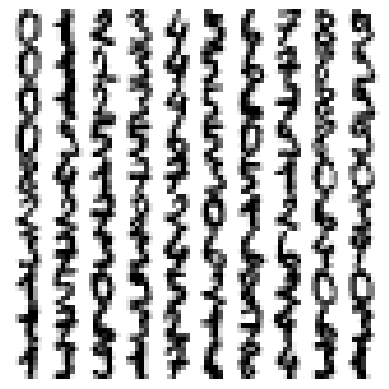

In [4]:
from sklearn.datasets import load_digits

data = load_digits()
X = data["data"]
Y = data["target"] 


### 1. Plot the first 100 images (with 10 images per row) as you did with MNIST. This dataset is  different from MNIST in sizes, number of examples, values, etc. You should modify the plotting function to accommodate the differences.

Again, I'm stealing the code from class to plot and changing the size to make it work with the digits data base

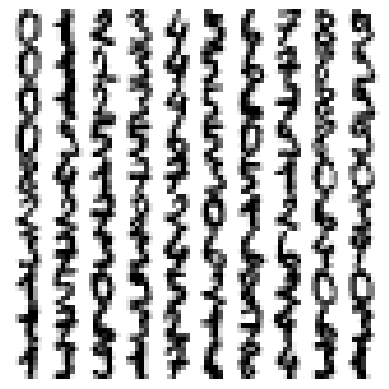

In [5]:
def plot_digits(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1 

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plot_digits(X[0:100])

### 2. Randomly split the data into 80% training data and 20% testing data. Keep this split fixed.

I will use pretty much the same procedure I used on the previous HW, create a permutation and then take the first 80%

In [8]:
m = len(Y)
np.random.seed(0)

# create a random index permutation
ind =np.array(range(0,m))
ind = np.random.permutation(ind)

[1081 1707  927 ... 1653  559  684]


In [10]:
# first 80% for train and last 20% for test 
split = int(m*0.8)
train_ind = ind[0:split]
test_ind = ind[split:m]

print(Y)
print(Y[train_ind])

[0 1 2 ... 8 9 8]
[2 8 2 ... 5 2 8]


### Extra: First use LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000) What does this do? Comment on the choice of arguments above.


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=1, random_state=0, max_iter=1000)
clf.fit(X[test_ind],Y[test_ind])

### 3. For each combinations of alphas, eta0s (a) instantiate SGDRegressor, (b) call fit(), (c) call predict() and measure training and validation scores.

Okay, now lets iterate over every possible pair of parameters

In [106]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

alphas = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]
eta0s = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]
n_a, n_e= (len(alphas), len(eta0s))

train_MSE = np.zeros((n_a, n_e))
valid_MSE = np.zeros((n_a, n_e))
# for each combination of alpha and eta
for i in range(n_a):
    for j in range(n_e):
        # instanciate the SGD predictor with alpha and eta      
        print(i,j, (alphas[i], eta0s[j]))
        SGD = SGDRegressor(
            max_iter=1000,
            tol=-np.infty,
            warm_start=True,
            penalty="l2",
            learning_rate="constant",
            random_state=0,
            alpha=alphas[i],
            eta0=eta0s[j])
        # fit the SGD with the train data
        SGD.fit(train["x"].values.reshape(-1,1), train["y"].values)
        # predict on train data
        y_predict = SGD.predict(train["x"].values.reshape(-1,1))
        # Store the MSE of the training
        train_MSE[i][j] = metrics.mean_squared_error(train["y"].values, y_predict)
        # predict on validation data
        y_predict = SGD.predict(valid["x"].values.reshape(-1,1))
        # Store the MSE of the validation
        valid_MSE[i][j] = metrics.mean_squared_error(valid["y"].values, y_predict)


0 0 (1e-06, 1e-06)
0 1 (1e-06, 1e-05)
0 2 (1e-06, 0.0001)
0 3 (1e-06, 0.001)
0 4 (1e-06, 0.01)
0 5 (1e-06, 0.1)
1 0 (1e-05, 1e-06)
1 1 (1e-05, 1e-05)
1 2 (1e-05, 0.0001)
1 3 (1e-05, 0.001)
1 4 (1e-05, 0.01)
1 5 (1e-05, 0.1)
2 0 (0.0001, 1e-06)
2 1 (0.0001, 1e-05)
2 2 (0.0001, 0.0001)
2 3 (0.0001, 0.001)
2 4 (0.0001, 0.01)
2 5 (0.0001, 0.1)
3 0 (0.001, 1e-06)
3 1 (0.001, 1e-05)
3 2 (0.001, 0.0001)
3 3 (0.001, 0.001)
3 4 (0.001, 0.01)
3 5 (0.001, 0.1)
4 0 (0.01, 1e-06)
4 1 (0.01, 1e-05)
4 2 (0.01, 0.0001)
4 3 (0.01, 0.001)
4 4 (0.01, 0.01)
4 5 (0.01, 0.1)
5 0 (0.1, 1e-06)
5 1 (0.1, 1e-05)
5 2 (0.1, 0.0001)
5 3 (0.1, 0.001)
5 4 (0.1, 0.01)
5 5 (0.1, 0.1)


### 4. Report the training and validation error for each combination. Which combination has the smallest validation error?

Now lets see my training and validation errors

[[14.07256381  7.42514385  4.05475996  4.05473429  4.05746396  4.20294752]
 [14.0725639   7.42514501  4.05475997  4.05473421  4.05746343  4.2029496 ]
 [14.07256472  7.42515658  4.05476011  4.05473347  4.05745811  4.20297041]
 [14.07257293  7.42527232  4.05476171  4.05472625  4.05740519  4.20317986]
 [14.0726551   7.42643169  4.05480027  4.05467713  4.05690688  4.20541653]
 [14.07347534  7.43820636  4.05729873  4.0563449   4.05483357  4.2403073 ]]
training min at:  4 3  val of:  4.054677132849451
[[16.74304488  7.91560744  4.18360787  4.17202624  4.1091341   4.63210136]
 [16.74304512  7.91561332  4.18361541  4.17203368  4.10914197  4.63212277]
 [16.74304751  7.91567214  4.18369085  4.17210809  4.10922072  4.63233688]
 [16.74307143  7.91626021  4.18444529  4.17285222  4.11000832  4.63447878]
 [16.74331061  7.92213644  4.19199552  4.18029993  4.11789981  4.65598076]
 [16.74569802  7.98044397  4.26795972  4.25530095  4.19820411  4.87749289]]
validation min at:  0 4  val of:  4.109134099090

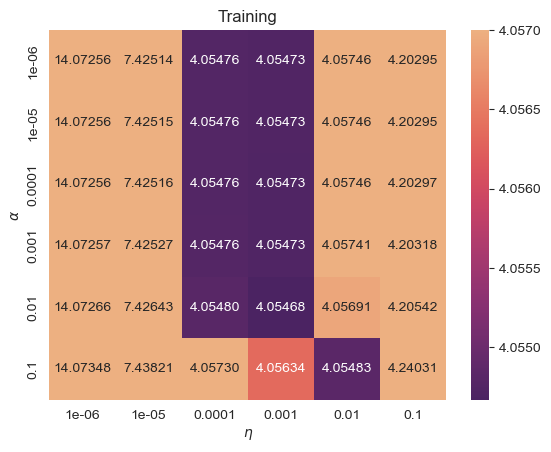

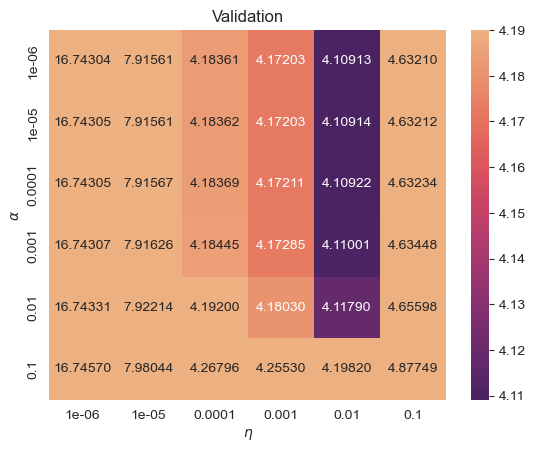

In [107]:
import seaborn as sns

# Training error
print(train_MSE)
sns.heatmap(
    train_MSE,
    vmin=4.05467,
    vmax=4.057,
    xticklabels=alphas,
    yticklabels=eta0s,
    cmap="flare_r",
    annot=True,
    fmt=".5f"
    )
plt.gca().set_xlabel(r"$\eta$")
plt.gca().set_ylabel(r"$\alpha$")
plt.gca().set_title("Training")
min_ind = np.argmin(train_MSE)
t_i, t_j = (min_ind // 6 , min_ind % 6)
print("training min at: ", t_i, t_j," val of: ", train_MSE[t_i][t_j])

# Validation error
plt.figure()
print(valid_MSE)
sns.heatmap(
    valid_MSE,
    vmin=4.1091,
    vmax=4.19,
    xticklabels=alphas,
    yticklabels=eta0s,
    cmap="flare_r",
    annot=True,
    fmt=".5f"
    )
plt.gca().set_xlabel(r"$\eta$")
plt.gca().set_ylabel(r"$\alpha$")
plt.gca().set_title("Validation")
min_ind = np.argmin(valid_MSE)
v_i, v_j = (min_ind // 6, min_ind % 6)
print("validation min at: ", v_i, v_j," val of: ", valid_MSE[v_i][v_j])

We got the smallest validation error with $\alpha=10^{-6}, \eta=0.01$.

In [108]:

print("alpha and  eta: ", (alphas[v_i], eta0s[v_j]))
alpha, eta = (alphas[v_i], eta0s[v_j])

alpha and  eta:  (1e-06, 0.01)


### 5. Now use these hyperparameters to retrain the model from scratch using ALL training data (=train + validation sets). Plot the training and test error as a function of epochs. You might want to use SGDRegressor(max_iter=1, ... )

I start by creating the full training set and the SGD which only iterates once per fit call (i.e. Only does a single step of the SGD)

In [109]:
N = 20
# full training set
full_ind = ind[0:split] 
full_train = df.iloc[full_ind]

# SGD that only does a single step
SGD = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty="l2",
    learning_rate="constant",
    random_state=0,
    alpha=alpha,
    eta0=eta)


Now let's train it and record the MSE as we iterate 1000 times.

In [110]:
MSEs = []
test_MSEs = []

for epoch in range(N):
    # training MSE
    SGD.fit(full_train["x"].values.reshape(-1,1), full_train["y"].values)
    y_predict = SGD.predict(full_train["x"].values.reshape(-1,1))
    MSEs.append(metrics.mean_squared_error(full_train["y"].values, y_predict))
    # test MSE
    y_predict = SGD.predict(test["x"].values.reshape(-1,1))
    test_MSEs.append(metrics.mean_squared_error(test["y"].values, y_predict))

and finally plot them

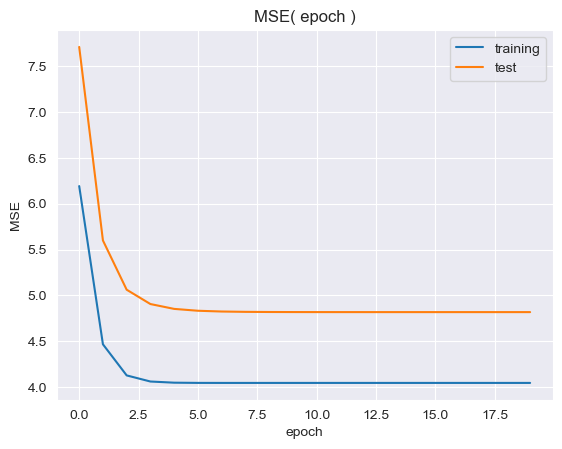

In [111]:
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(range(N), MSEs, label="training")
plt.plot(range(N), test_MSEs, label="test")
plt.title("MSE( epoch )")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()


### 6. Report the test score or this final model, and also plot the test data vs final linear regression as a line.

The final test MSE is $4.81857$ and the plot of the test data against the data look like this

final MSE=  4.8185724548362785


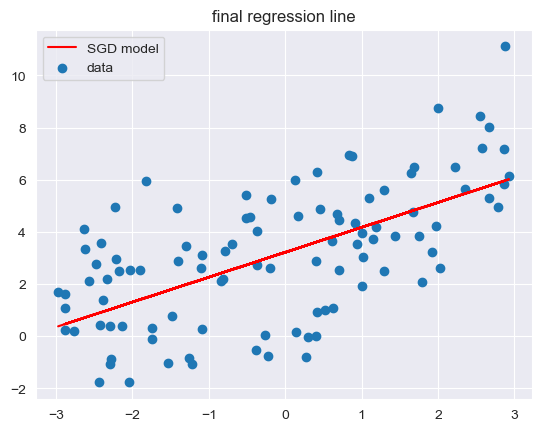

In [112]:
print("final MSE= ",test_MSEs[-1])

m = SGD.coef_[0]
b = SGD.intercept_[0]
Yp= m*X+b

plt.plot(X,Yp,linestyle="solid", color = "red", label="SGD model")
plt.scatter(X,Y, label="data")
plt.title("final regression line")
plt.legend()
